## Manual

In [18]:
import torch
from torch import nn

In [19]:
X=torch.tensor([1,2,3,4],dtype=torch.float32) #change
Y=torch.tensor([2,4,6,8],dtype=torch.float32) #change
w=torch.tensor(0,dtype=torch.float32,requires_grad=True)#change

In [20]:
def forward(x):
    return w*x

def loss (y, y_pred):
    return ((y_pred-y)**2).mean()

In [21]:
print (f'Prediction before training: f(5)={forward(5):.3f}')

Prediction before training: f(5)=0.000


In [22]:
learning_rate=.01
n_itr=100

for epoch in range(n_itr):
    y_pred=forward(X)
    l=loss(Y,y_pred)

    l.backward()                   #change: will calculate gradients dl/dw or w.grad
    with torch.no_grad():  #update weights; weight update is not part of gradient tracking
        w-=learning_rate*w.grad
    w.grad.zero_() # w is updated, but dl/dw which is w.grad has values and will be accumlulated so we make it zero

    if epoch% 10==0:
        print(f'epoch {epoch+1}:w={w:.3f},loss={l:.3f}')

epoch 1:w=0.300,loss=30.000
epoch 11:w=1.665,loss=1.163
epoch 21:w=1.934,loss=0.045
epoch 31:w=1.987,loss=0.002
epoch 41:w=1.997,loss=0.000
epoch 51:w=1.999,loss=0.000
epoch 61:w=2.000,loss=0.000
epoch 71:w=2.000,loss=0.000
epoch 81:w=2.000,loss=0.000
epoch 91:w=2.000,loss=0.000


In [6]:
print (f'Prediction before training: f(5)={forward(5):.3f}')

Prediction before training: f(5)=10.000


## Using PyTorch 

In [9]:
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)
X_test = torch.tensor([5], dtype=torch.float32)

In [24]:
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.lin = nn.Linear(input_dim, output_dim)
    def forward(self, x):
        return self.lin(x)
model = LinearRegression(1, 1)
model.parameters

<bound method Module.parameters of LinearRegression(
  (lin): Linear(in_features=1, out_features=1, bias=True)
)>

In [13]:
print (f'Prediction before training: f(5)={model(X_test).item():.3f}')
learning_rate = 0.01
n_iters = 100
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
for epoch in range(n_iters):
    y_predicted = model(X)
    l = loss(Y, y_predicted)
    l.backward()# calculates (d loss/dw)
    optimizer.step() #updates the weights using (d loss/dw)
    optimizer.zero_grad() #we have updated w so (d loss/dw)=0

    if epoch % 10 == 0:
        [w, b] = model.parameters() # unpack parameters
        print('epoch ', epoch+1, ': w = ', w[0][0].item(), ' loss = ', l)

Prediction before training: f(5)=-4.631
epoch  1 : w =  -0.3535447120666504  loss =  tensor(67.8867, grad_fn=<MeanBackward0>)
epoch  11 : w =  1.5362569093704224  loss =  tensor(1.7711, grad_fn=<MeanBackward0>)
epoch  21 : w =  1.8427455425262451  loss =  tensor(0.0597, grad_fn=<MeanBackward0>)
epoch  31 : w =  1.8944857120513916  loss =  tensor(0.0146, grad_fn=<MeanBackward0>)
epoch  41 : w =  1.9051775932312012  loss =  tensor(0.0127, grad_fn=<MeanBackward0>)
epoch  51 : w =  1.9091969728469849  loss =  tensor(0.0119, grad_fn=<MeanBackward0>)
epoch  61 : w =  1.912075161933899  loss =  tensor(0.0112, grad_fn=<MeanBackward0>)
epoch  71 : w =  1.9147039651870728  loss =  tensor(0.0106, grad_fn=<MeanBackward0>)
epoch  81 : w =  1.9172286987304688  loss =  tensor(0.0100, grad_fn=<MeanBackward0>)
epoch  91 : w =  1.9196743965148926  loss =  tensor(0.0094, grad_fn=<MeanBackward0>)


In [14]:
print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')

Prediction after training: f(5) = 9.839


## Linear Regression

In [15]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

epoch: 10, loss = 3975.6082


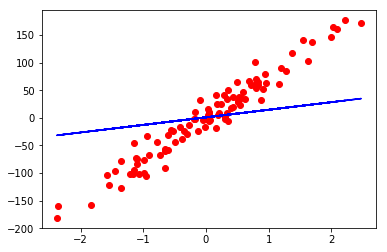

epoch: 20, loss = 2804.1084


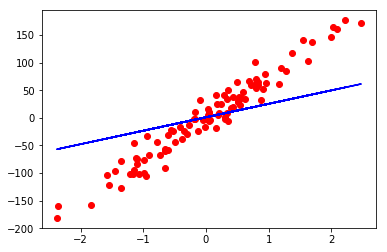

epoch: 30, loss = 2005.3380


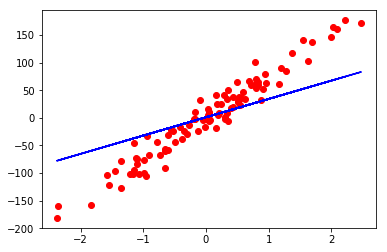

epoch: 40, loss = 1460.5944


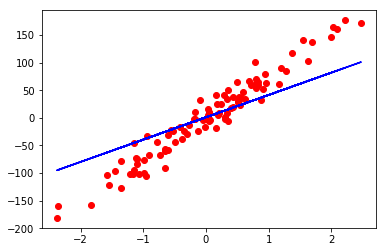

epoch: 50, loss = 1089.0148


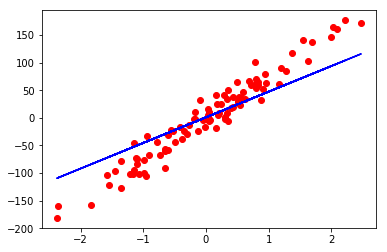

epoch: 60, loss = 835.5029


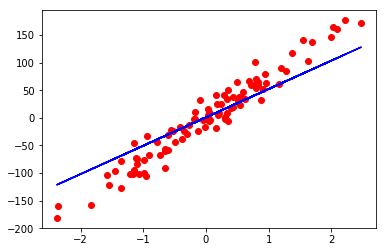

epoch: 70, loss = 662.5096


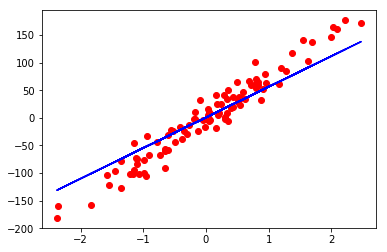

epoch: 80, loss = 544.4385


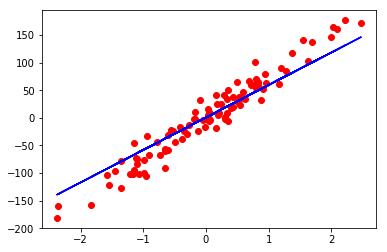

epoch: 90, loss = 463.8375


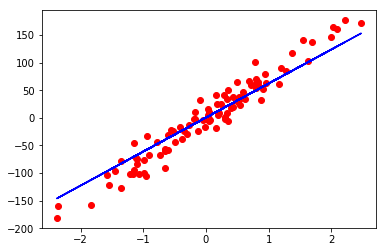

epoch: 100, loss = 408.8055


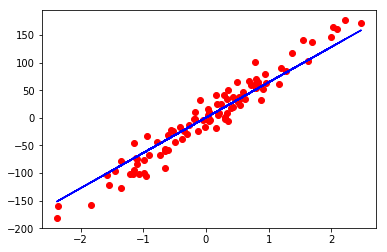

In [25]:
# 0) Prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

# cast to float Tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

# 1) Model
# Linear model f = wx + b
input_size = 1
output_size = 1
model = nn.Linear(input_size, output_size)

# 2) Loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)

    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

        predicted = model(X).detach().numpy()
        plt.plot(X_numpy, y_numpy, 'ro')
        plt.plot(X_numpy, predicted, 'b')
        plt.show()